In [2]:
from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI
%matplotlib inline

In [3]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70
16. 4HFI_pH70
17. 4NPQ_F238LI233T_pH46
18. 4NPQ_F238L_pH46
19. 4NPQ_pH46
20. 4NPQ_I233T_pH46

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n\n'

In [4]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3',
              '5NJY_F238L_pH46_md1','5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1',
              '4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5',
              '4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1',
              '4NPQ_F238LI233T_pH46_md1','4NPQ_F238L_pH46_md1',
              '4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [60]:
md_data = pd.read_csv("glic_gating_new.csv")

In [8]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [9]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [10]:
md_traj10 = md_data[(md_data.traj_time >= 10)]

In [65]:
md_data.columns

Index(['Unnamed: 0', 'MD_name', 'pH', 'replicate', 'traj_time', 'system',
       'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'pore_profile_222',
       'pore_profile_226', 'pore_profile_230', 'pore_profile_233',
       'pore_profile_237', 'pore_profile_240', 'helix tilt angle',
       'helix twist angle', 'hydration_data', 'beta_expansion', 'M2_radius',
       'ECD_radius'],
      dtype='object')

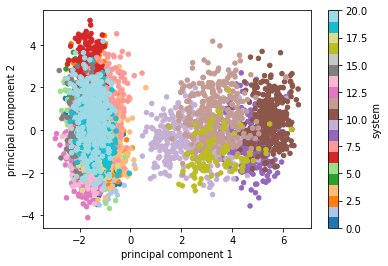

In [43]:
#PCA of features
from sklearn.preprocessing import StandardScaler
features = ['tmd_pc1', 'domain twist','tmd_pc2', 'helix tilt angle', 'helix twist angle',
       'pore_profile_222', 'pore_profile_226', 'pore_profile_230',
       'pore_profile_233', 'pore_profile_237','pore_profile_240','hydration_data']
# Separating out the features
x = md_data.loc[:, features].values
# Separating out the target
y = md_data.loc[:,['system']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, md_data[['system']]], axis = 1)
ax = plt.subplot()

finalDf.plot(kind='scatter',x='principal component 1',y='principal component 2',c='system',ax=ax,colormap='Vega20')

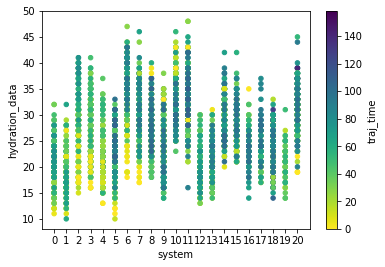

In [61]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='hydration_data',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

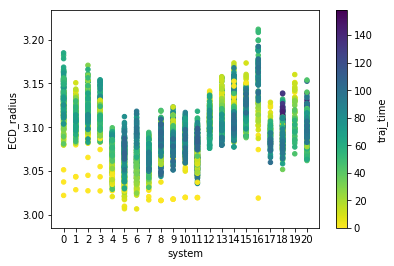

In [64]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='ECD_radius',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

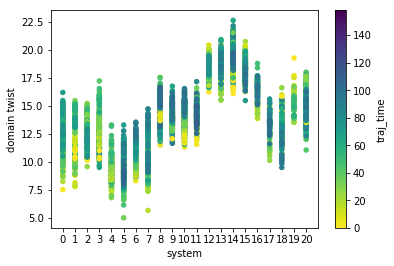

In [67]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='domain twist',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

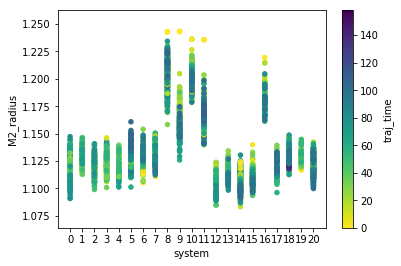

In [62]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='M2_radius',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

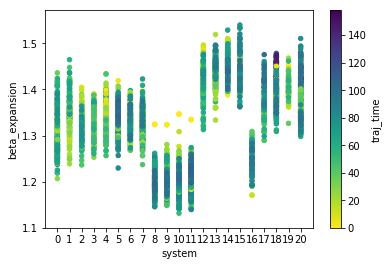

In [63]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='beta_expansion',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

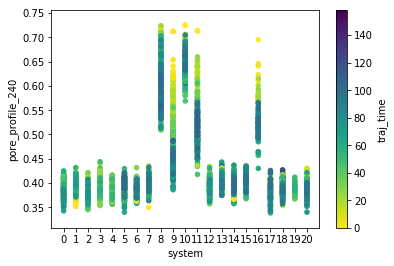

In [49]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='pore_profile_240',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

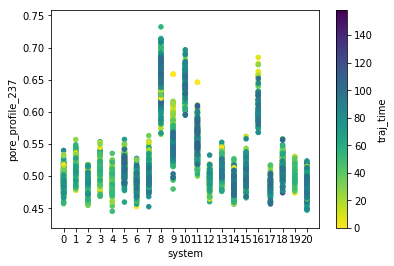

In [50]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='pore_profile_237',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

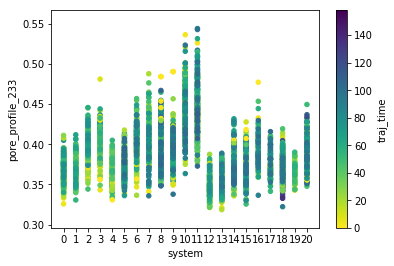

In [51]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='pore_profile_233',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

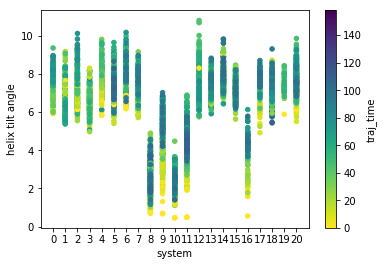

In [72]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='helix tilt angle',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

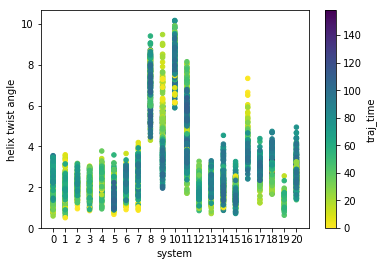

In [73]:
ax = plt.subplot()
md_data.plot(kind='scatter',x='system',y='helix twist angle',c='traj_time',colormap='viridis_r',ax=ax)
ax.set_xticks((np.arange(0,21)))
plt.show()

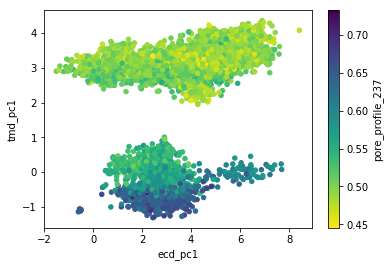

In [21]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='pore_profile_237',ax=ax,colormap='viridis_r')

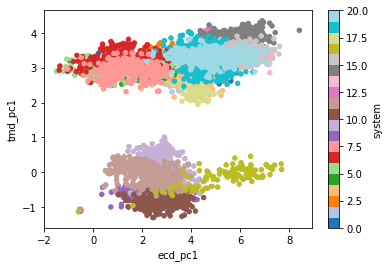

In [22]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c="system",ax=ax,colormap='Vega20')

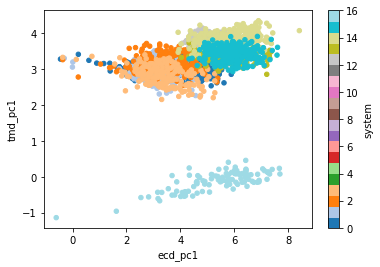

In [23]:
ax = plt.subplot()
md_data[md_data['pH'] == 70].plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='system',ax=ax,colormap='Vega20')

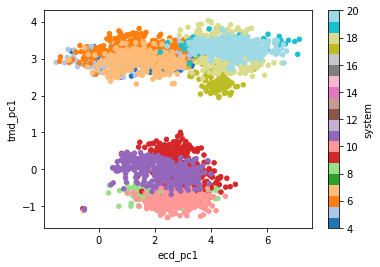

In [24]:
ax = plt.subplot()
md_data[md_data['pH'] == 46].plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='system',ax=ax,colormap='Vega20')

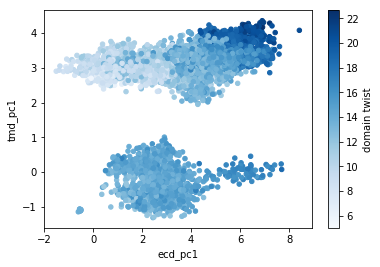

In [25]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='domain twist',ax=ax,colormap='Blues')

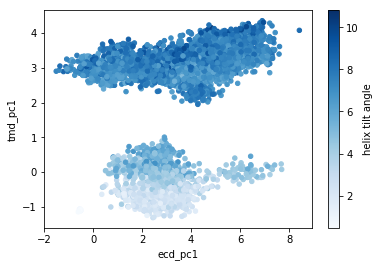

In [26]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='helix tilt angle',ax=ax,colormap='Blues')

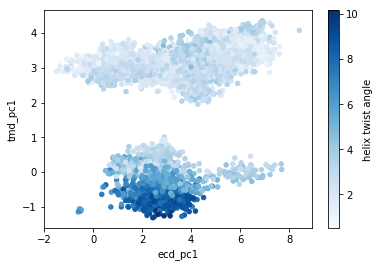

In [27]:
ax = plt.subplot()
md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1",c='helix twist angle',ax=ax,colormap='Blues')

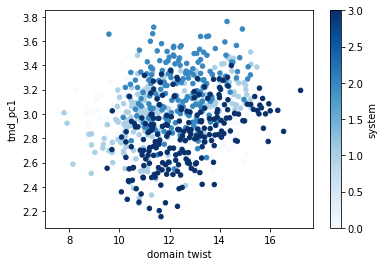

In [29]:
# 5NJY_pH70
ax = plt.subplot()
md_5NJY_pH70.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

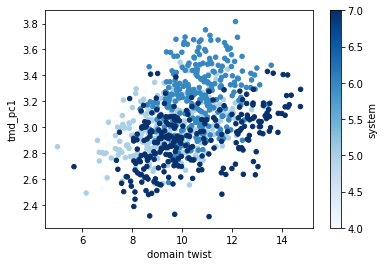

In [30]:
# 5NJY_pH46
ax = plt.subplot()
md_5NJY_pH46.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

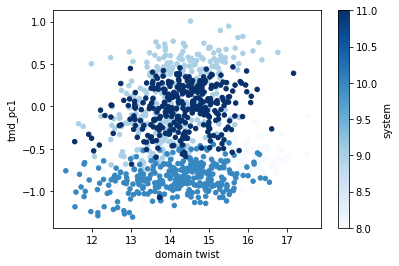

In [31]:
# 4HFI_pH46
ax = plt.subplot()
md_4HFI_pH46.plot(kind="scatter",x="domain twist",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

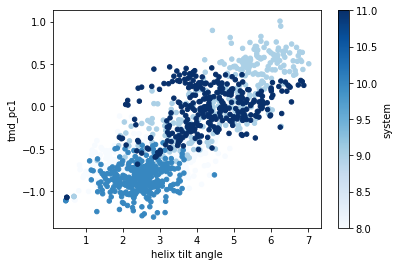

In [32]:
# 4HFI_pH46
ax = plt.subplot()
md_4HFI_pH46.plot(kind="scatter",x="helix tilt angle",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

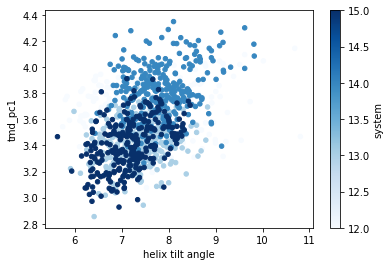

In [33]:
# 4NPQ_pH70
ax = plt.subplot()
md_4NPQ_pH70.plot(kind="scatter",x="helix tilt angle",y="tmd_pc1",c='system',ax=ax,colormap='Blues')

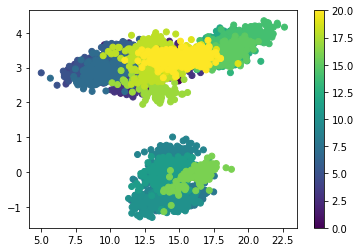

In [34]:
ax = plt.scatter(md_data['domain twist'],md_data['tmd_pc1'],c=md_data['system'])
cbar = plt.colorbar()

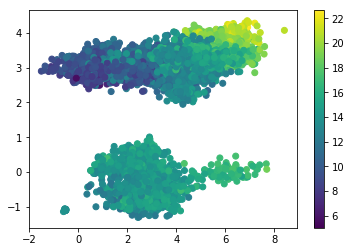

In [35]:
ax = plt.scatter(md_data['ecd_pc1'],md_data['tmd_pc1'],c=md_data['domain twist'])
cbar = plt.colorbar()

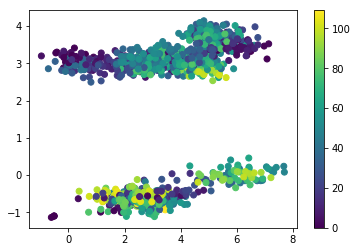

In [36]:
#WT
ax = plt.scatter(md_WT['ecd_pc1'],md_WT['tmd_pc1'],c=md_WT['traj_time'])
cbar = plt.colorbar()

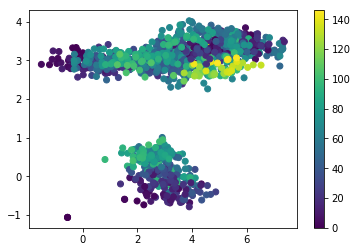

In [37]:
#F238L
ax = plt.scatter(md_F238L['ecd_pc1'],md_F238L['tmd_pc1'],c=md_F238L['traj_time'])
cbar = plt.colorbar()

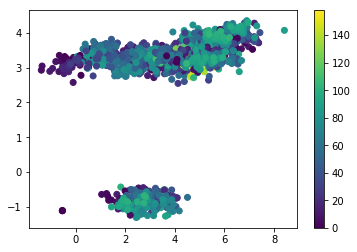

In [38]:
#I233T
ax = plt.scatter(md_I233T['ecd_pc1'],md_I233T['tmd_pc1'],c=md_I233T['traj_time'])
cbar = plt.colorbar()

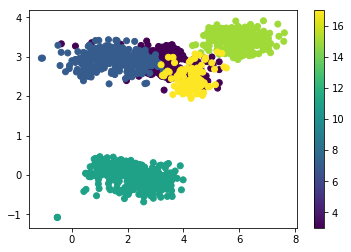

In [39]:
#F238LI233T
ax = plt.scatter(md_F238LI233T['ecd_pc1'],md_F238LI233T['tmd_pc1'],c=md_F238LI233T['system'])
cbar = plt.colorbar()